# Intro to MLOps

## Academic/Kaggle Experience

Dataset --> Exploration --> Modeling, iterate over exploration --> Metric, iterate over modeling

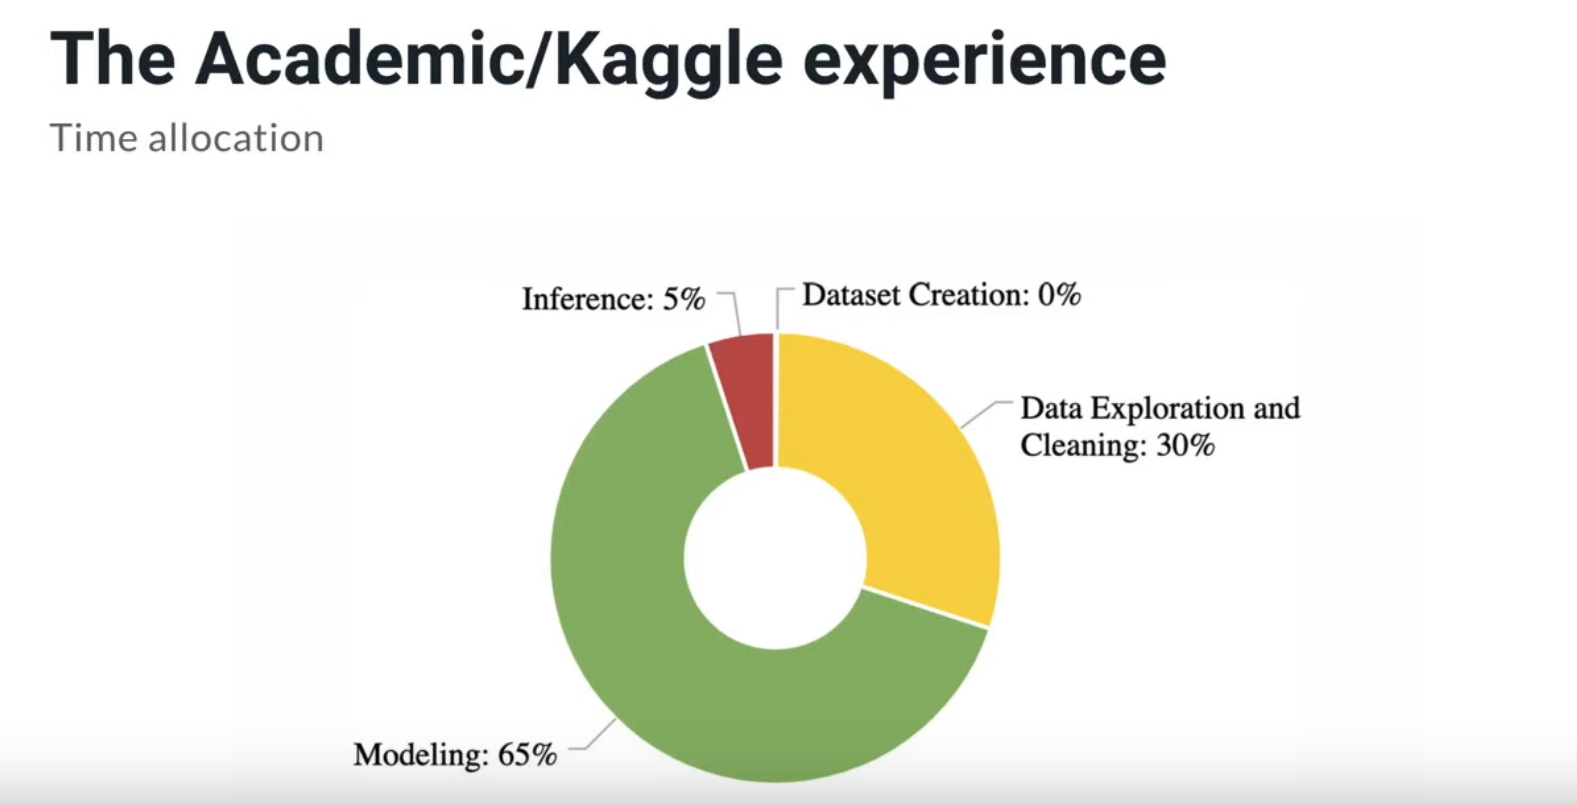

## ML in the Wild

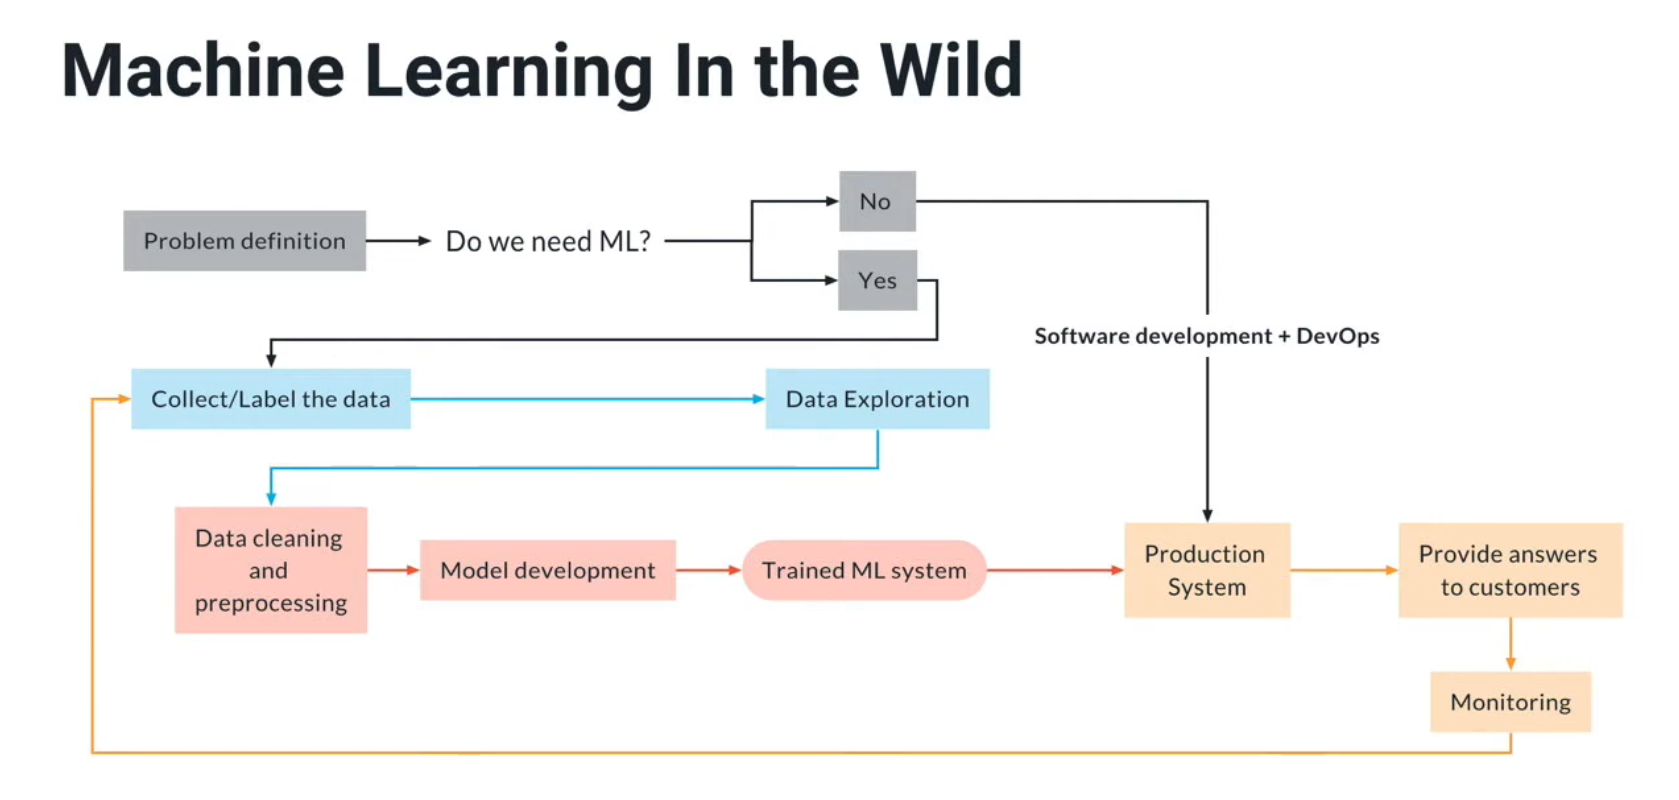

 - Production: Models not in prod are useless
 - Usability: 70% accuracy in prod is better than 90% and never can be used
 - Dependability: Avoid performance drift (monitoring, continuous training)
   - Correct by re-training on new data, etc.
 - Reproductibility The process must be transparent and repeatable

## What is MLOps?

"Best practices and methods for efficient e-2-e dev and operation of performant, scalable, reliable, automated, and reproducible ML solutions in a real production environment"

# Typical ML Training Pipeline

1. Fetch data
2. pre-processing
3. data checks
4. data segregation (create a train and test dataset/split)
5. train and validate
6. test
7. store in model registry

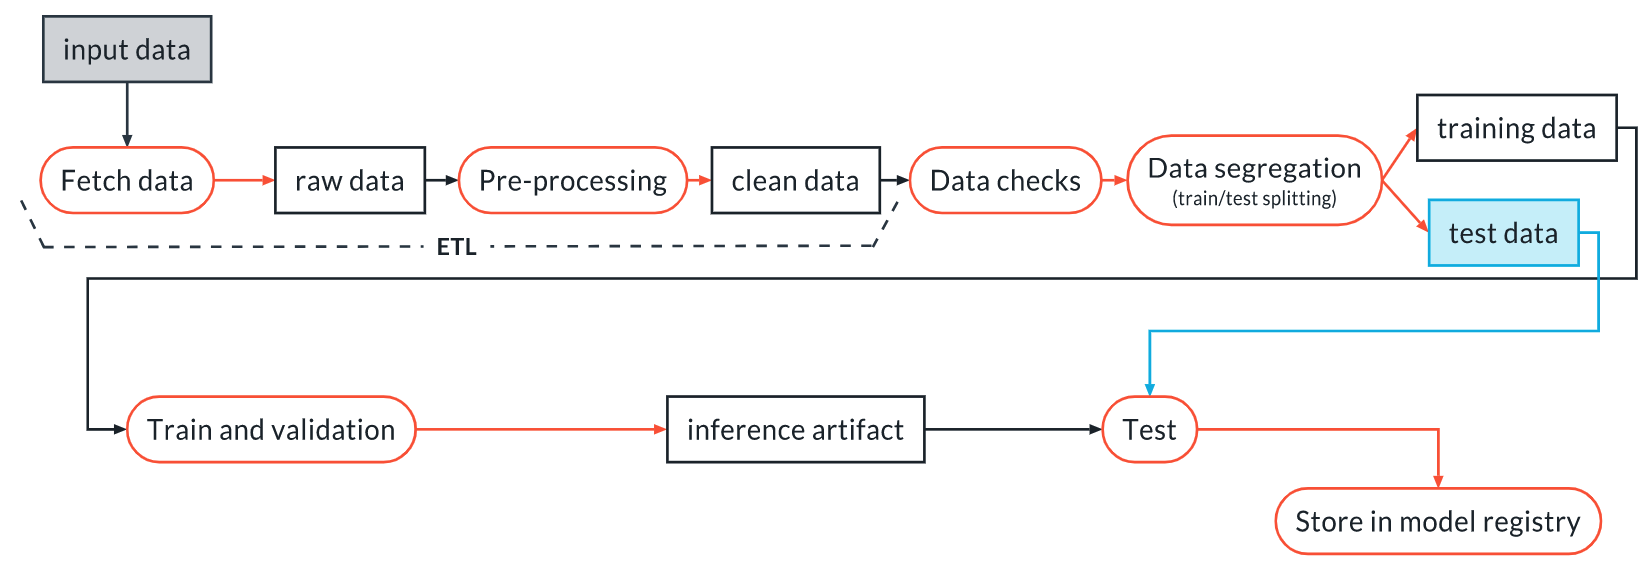

# `argparse`/`logging` Modules

`argparse` - parse command line args

`logging` - well... yeah. Kinda like print statements, but more robust
- a lot more configurable

(this would need to go in a python script that you invoke from the CLI)

In [ ]:
!type logging+argparse.py  # please forgive me for using Windows CMD

import argparse
import logging

# print current time and message
# using INFO verbosity setting
logging.basicConfig(level=logging.INFO, format='%(asctime)-15s %(message)s')
logger = logging.getLogger()

def do(args):
    logger.info("This is a message.")
    logger.warning("This is a warning")
    logger.error("This is an error")

if __name__ == '__main__':  # if ran as a script (not imported)
    parser = argparse.ArgumentParser(
        description="This is a sample using argparse"
    )

    # type= arg can do casting
    parser.add_argument(
        "--test-arg", type=str, help="This is just a test", required=False,
        default="your mom"
    )

    parser.add_argument(
        "--no-u", type=str, help="This is just a test", required=True
    )

    args = parser.parse_args()   # takes input from user and parses it

    do(args)


In [10]:
!py logging+argparse.py -h

usage: name_this_program [-h] [-a ARGUEMENT] -n NOTHING

This is a sample using argparse

options:
  -h, --help            show this help message and exit
  -a ARGUEMENT, --arguement ARGUEMENT
                        This is just a test
  -n NOTHING, --nothing NOTHING
                        This is just a test

Yep, that's it


In [14]:
!py logging+argparse.py -a "lets go" -n "yep"

2025-11-19 21:22:24,827 This is a message.
2025-11-19 21:22:24,827 This is a warning
2025-11-19 21:22:24,827 This is an error
2025-11-19 21:22:24,827 ('lets go', 'yep')


In [15]:
!py logging+argparse.py -n "nope"

2025-11-19 21:22:49,648 This is a message.
2025-11-19 21:22:49,648 This is a warning
2025-11-19 21:22:49,648 This is an error
2025-11-19 21:22:49,648 ('your mom', 'nope')


# Versioning Data and Artifacts

A run is a unit of computation

You can attach these to a run:
- params
- metrics
- artifacts
- images/plots

Experiment is a group of runs that is generated by a user

Project: A heterogeneous collection of all runs, experiments, and artifacts
- can only look at one at a time

Artifact: any file or dir produced by the code when ran. Every artifact that is logged to run is auto-versioned by W&B.
- This means that, if an identical artifact was created with the same code, it will not be uploaded to wandb. 

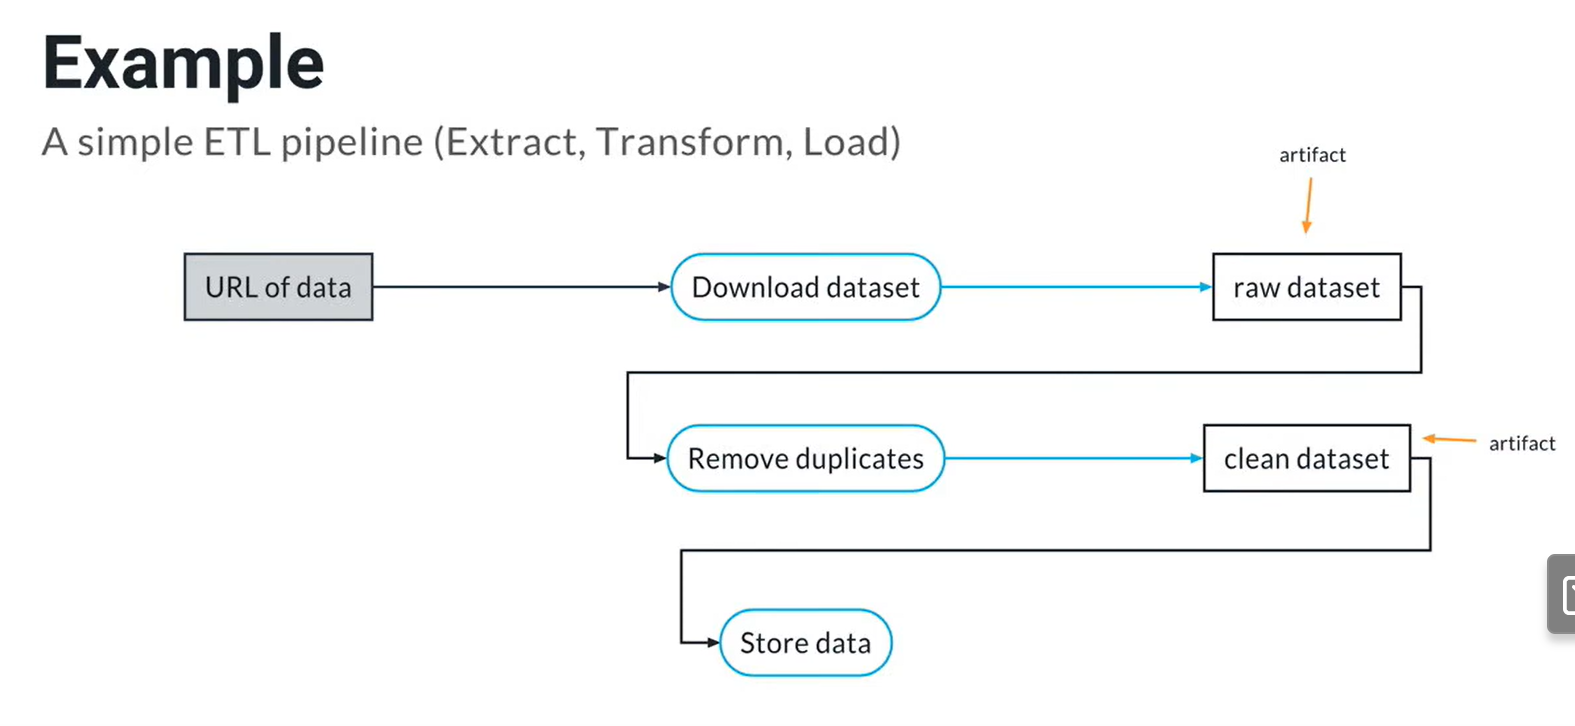

## Tracking with W&B

In [1]:
import wandb

run = wandb.init(
    project='my_proj',
    job_type='data_cleaning',  # good for filtering and visualizing
    group='experiment_1'
)

wandb: Currently logged in as: ethnsyrs (ethnsyrs-wgu) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


## Creating an artifact

In [17]:
with open("my_artifact.txt", "w") as f:
    f.write("This is an example artifact.")

Now you'll need to create a run

In [5]:
run = wandb.init(
    project="demo_artifact",
    group="experiment_1"
)

Now uploading...

In [8]:
artifact = wandb.Artifact(
    name='my_artifact.txt', 
    type='data',
    description='Descriptive',
    metadata={
        "key_1": "val_1"
    }
)

In [11]:
artifact.add_file(
    local_path='./my_artifact.txt'
)

ArtifactManifestEntry(path='my_artifact.txt', digest='U/03T9/FNh1OF6dgSGZFfg==', size=28, local_path='/home/birddog/.local/share/wandb/artifacts/staging/tmprl7_xjgd', skip_cache=False)

Attach it to the run

In [12]:
run.log_artifact(artifact)

<Artifact my_artifact.txt>

If you finish or close the run, the artifact will actually be uploaded OR every X increment of time

Logging it does not mean it will be available on w&b.

In [ ]:
run.finish()  # upload artifacts and close the run obj

Uploading a new version of an artifact can be done by simulating another run:

In [10]:
import wandb

with open("my_artifact.txt", "w") as f:
    f.write("This is an example artifact, but newer.")
    
    
run = wandb.init(
    project="demo_artifact",
    group="experiment_1"
)

artifact = wandb.Artifact(
    name='my_artifact.txt', 
    type='data',
    description='Descriptive',
    metadata={
        "key_1": "val_1"
    }
)

artifact.add_file(
    local_path='./my_artifact.txt'
)

run.log_artifact(artifact)
run.finish()

**Using runs with context managers**

(show that version does not change even across multiple runs if the artifact does not change)

In [3]:
import wandb

In [5]:
with wandb.init(project='multiple_runs') as run:
    artifact = wandb.Artifact(
        name='my_artifact.txt', 
        type='data',
        description='Descriptive',
        metadata={
            "key_1": "val_1"
            }
    )

    artifact.add_file(local_path='./my_artifact.txt')
    
# run was closed and saved to wanbd

# ML Pipeline in MLFlow

MLFlow projects have 3 things
- Environ definition (conda or docker)
- Project definition
- Code - this can be in any language

Just check out the material in lesson 2.11 if you need more info.

Structure of an MLFlow pipeline is below

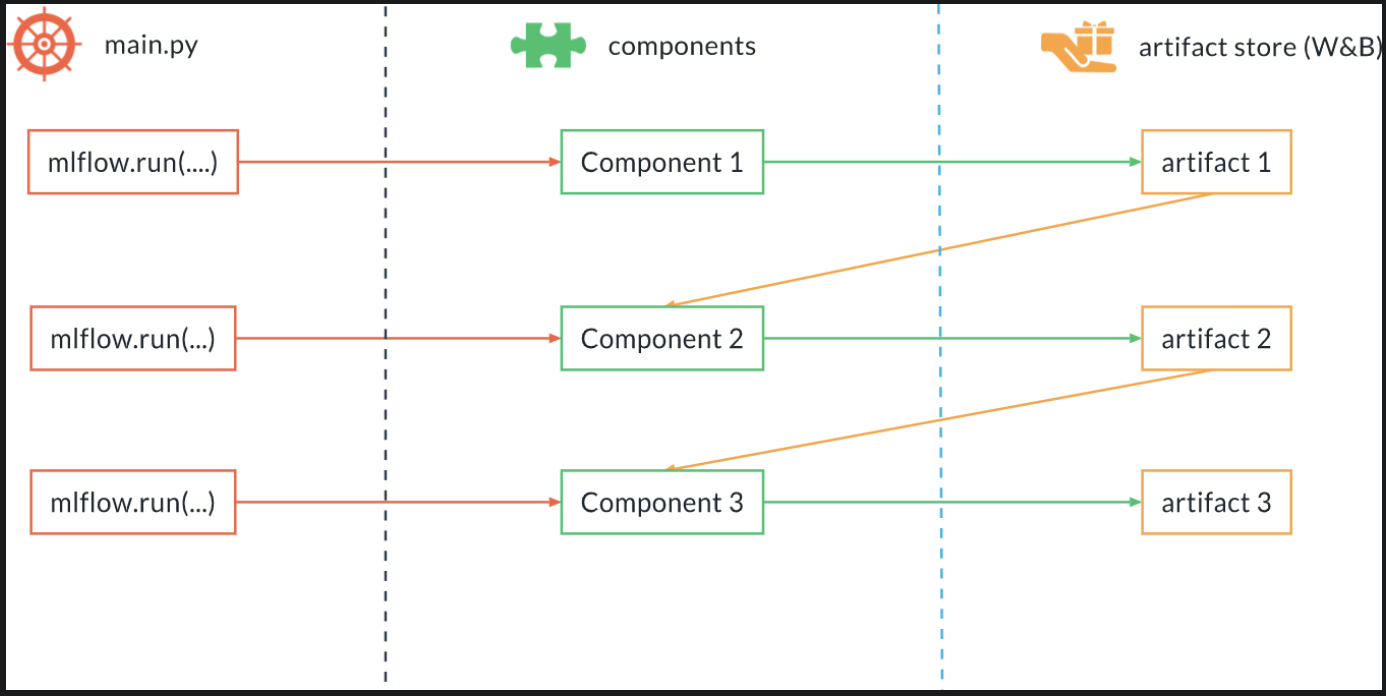

`main.py` makes several calls to mlflow.run, which is a pythonic way to call `mlflow run` and using it as a component in a script. Each component then produces an artifact to feed the next.

## Using `mlflow.run`